In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '../input/cotton-disease-dataset/Cotton Disease/train'
valid_path = '../input/cotton-disease-dataset/Cotton Disease/test'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



58889256/58889256 [==============================] - 0s 0us/step


In [4]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('../input/cotton-disease-dataset/Cotton Disease/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('../input/cotton-disease-dataset/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

FileNotFoundError: [Errno 2] No such file or directory: '../input/cotton-disease-dataset/Cotton Disease/train'

In [ ]:
test_set = test_datagen.flow_from_directory('../input/cotton-disease-dataset/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=4,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/4
61/61 [==============================] - 398s 7s/step - loss: 0.8246 - accuracy: 0.7160 - val_loss: 0.2865 - val_accuracy: 0.8868
Epoch 2/4
61/61 [==============================] - 397s 7s/step - loss: 0.2455 - accuracy: 0.9154 - val_loss: 0.2238 - val_accuracy: 0.9340
Epoch 3/4
61/61 [==============================] - 385s 6s/step - loss: 0.1701 - accuracy: 0.9405 - val_loss: 0.1975 - val_accuracy: 0.9340
Epoch 4/4
61/61 [==============================] - 396s 6s/step - loss: 0.1419 - accuracy: 0.9569 - val_loss: 0.1584 - val_accuracy: 0.9340


### Testing


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('../input/cotton-disease-dataset/Cotton Disease/test/fresh cotton leaf/d (7)_iaip.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

### Conclusion

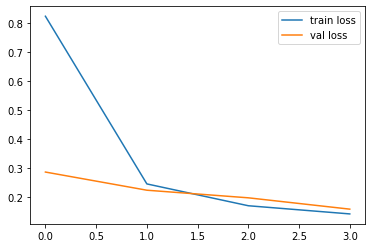

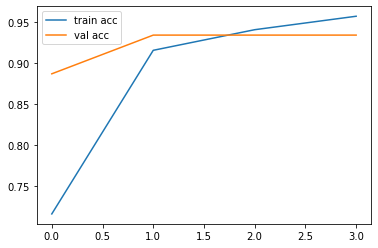

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
result

array([[1.3959750e-05, 4.5795286e-08, 9.9998605e-01, 4.0527361e-08]],
      dtype=float32)

In [ ]:
a= np.argmax(model.predict(test_image),axis=1)

In [ ]:
a

array([2])

### Libraries

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

### Training & DataLoader


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path1 = '../input/cotton-disease-dataset/Cotton Disease/train'
valid_path1 = '../input/cotton-disease-dataset/Cotton Disease/test'

### Building the ResNet 50

In [ ]:
ResNet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in ResNet50.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders1 = glob('../input/cotton-disease-dataset/Cotton Disease/train/*')

In [ ]:
# our layers - you can add more if you want
x1 = Flatten()(ResNet50.output)

In [ ]:
prediction1 = Dense(len(folders1), activation='softmax')(x1)

# create a model object
model1 = Model(inputs=ResNet50.input, outputs=prediction1)

### Summary

In [ ]:
# view the structure of the model
model1.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

### Training The ResNet 50

In [ ]:
# tell the model what cost and optimization method to use
model1.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen1 = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen1 = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen1.flow_from_directory('../input/cotton-disease-dataset/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen1.flow_from_directory('../input/cotton-disease-dataset/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [ ]:

d = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=4,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/4
61/61 [==============================] - 390s 6s/step - loss: 0.1296 - accuracy: 0.9569 - val_loss: 0.1977 - val_accuracy: 0.9434
Epoch 2/4
61/61 [==============================] - 382s 6s/step - loss: 0.1006 - accuracy: 0.9662 - val_loss: 0.1333 - val_accuracy: 0.9528
Epoch 3/4
61/61 [==============================] - 395s 6s/step - loss: 0.0988 - accuracy: 0.9739 - val_loss: 0.1029 - val_accuracy: 0.9528
Epoch 4/4
61/61 [==============================] - 381s 6s/step - loss: 0.0826 - accuracy: 0.9744 - val_loss: 0.1951 - val_accuracy: 0.9340


### Testing


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('../input/cotton-disease-dataset/Cotton Disease/test/fresh cotton plant/dsd (140)_iaip.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result1 = model1.predict(test_image)

### Conclusion

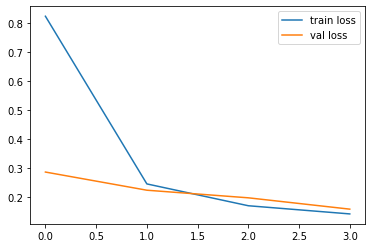

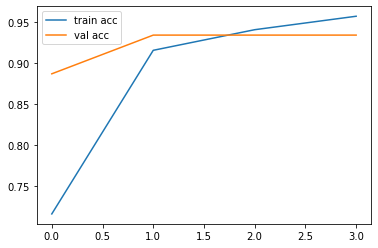

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
result1

array([[0.20252916, 0.09876883, 0.5913873 , 0.10731473]], dtype=float32)

In [ ]:
result1 = result1.ravel()

In [ ]:
result1=result1.tolist()

In [ ]:
result1

[0.2025291621685028,
 0.09876883029937744,
 0.5913872718811035,
 0.10731472820043564]

In [ ]:
a1= np.argmax(model1.predict(test_image),axis=1)

In [ ]:
a1

array([2])

### Final conclusion

In [ ]:
classes=["diseased_leaf","diseased_plant","fresh_leaf","fresh_plant"]
max =result1[0];
i = 0;

#Loop through the array
for index, value in enumerate(result1):
    #Compare elements of array with max
    if(value > max):
        max = value;
        i = index
print("Largest element present in given array: " + str(max) +" And it belongs to " +str(classes[i]) +" class.");

Largest element present in given array: 0.5913872718811035 And it belongs to fresh_leaf class.


In [12]:
filename = "model.h5"
model.save(filename)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
from google.colab import files

files.download('model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>